<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "400">

# **Como obter e analisar dados de fundos de investimento**


Queremos responder algumas perguntas importantes, como:

1. Qual fundo do Brasil tem o maior PL (patrimônio líquido)?
2. Como obter a variação da cota para um fundo específico?
3. Como recuperar dados de um fundo específico sabendo apenas o seu nome?
4. Qual o fundo que teve a cota que mais subiu?
5. Qual o fundo que teve a cota que mais caiu?

# Noções Básicas

**O que é um Fundo de Investimentos?**

Um fundo de investimentos funciona como uma espécie de condomínio.

Dentro de um fundo temos vários segmentos:

Existe a empresa administradora do fundo, o gestor, os profissionais que fazem a auditoria sobre os números do fundo e, por fim, mas não menos importante, os investidores, ou nesse caso, os cotistas.

Para simplificar a compreensão de um fundo, é sempre válido pensar nele exatamente como um condomínio:

As pessoas vivem juntas em um mesmo terreno, porque assim várias coisas acabam sendo divididas. Os custos para manutenção são compartilhados, a segurança, a área de lazer e diversas outras áreas.

O fundo de investimento parte da mesma prerrogativa: Porque investir sozinho, se o investidor pode fazer isso com mais pessoas, utilizando muito mais recursos e contratando um profissional ultra qualificado para cuidar de todo esse dinheiro?

É por isso que, em grande parte, os fundos funcionam como condomínios.

Fonte: https://maisretorno.com/portal/termos/f/fundo-de-investimentos

<center><img src = "https://blog.yubb.com.br/wp-content/uploads/2017/12/01.12.2017-fundos-de-investimento.png?raw=true" width = "500">

Fonte: https://blog.yubb.com.br/entenda-os-fundos-de-investimentos/

Para dados de desempenho dos fundos:

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Para dados cadastrais dos fundos:

http://dados.cvm.gov.br/dados/FI/CAD/DADOS/

# Extração e processamento

Importando as bibliotecas

In [17]:
import zipfile
import io 
import pandas as pd
import requests

Captura de Dados

In [34]:
arquivo = 'inf_diario_fi_202401.csv'

link = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS//inf_diario_fi_202401.zip'



In [35]:
r = requests.get(link)

In [36]:
r

<Response [200]>

In [37]:
zf = zipfile.ZipFile(io.BytesIO(r.content))

In [38]:
arquivo_fi = zf.open(arquivo)

In [39]:
linhas = arquivo_fi.readlines()

In [40]:
#essa linha de código está removendo espaços em branco do início e do final de cada elemento da lista linhas 
# e, em seguida, decodificando cada elemento 
linhas = [i.strip().decode('ISO-8859-1') for i in linhas]

In [41]:
linhas = [i.split(';') for i in linhas]

In [42]:
linhas[0]

['TP_FUNDO',
 'CNPJ_FUNDO',
 'DT_COMPTC',
 'VL_TOTAL',
 'VL_QUOTA',
 'VL_PATRIM_LIQ',
 'CAPTC_DIA',
 'RESG_DIA',
 'NR_COTST']

In [44]:
df =pd.DataFrame(linhas, columns= linhas[0])
df

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
1,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298859700000,1139708.10,0.00,0.00,1
2,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312302900000,1140154.80,0.00,0.00,1
3,FI,00.017.024/0001-53,2024-01-04,1137741.93,34.326023200000,1140610.71,0.00,0.00,1
4,FI,00.017.024/0001-53,2024-01-05,1138240.64,34.338220800000,1141016.02,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
567664,FI,97.929.213/0001-34,2024-01-25,87100135.26,11.616057000000,83636707.16,0.00,0.00,2
567665,FI,97.929.213/0001-34,2024-01-26,87186054.76,11.627913170000,83583010.67,0.00,139062.05,2
567666,FI,97.929.213/0001-34,2024-01-29,87209656.10,11.631119520000,83606058.33,0.00,0.00,2
567667,FI,97.929.213/0001-34,2024-01-30,85912226.51,11.610815220000,83460108.29,0.00,0.00,2


In [45]:
informes_diarios = df[1:].reset_index()

In [46]:
informes_diarios.dtypes

index             int64
TP_FUNDO         object
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         object
VL_QUOTA         object
VL_PATRIM_LIQ    object
CAPTC_DIA        object
RESG_DIA         object
NR_COTST         object
dtype: object

In [47]:
#Transformando para numérico 
informes_diarios[['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST']] = informes_diarios[['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST']].apply(pd.to_numeric)


In [48]:
informes_diarios.dtypes 

index              int64
TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

In [49]:
informes_diarios.head()

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,1,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298860,1139708.10,0.0,0.0,1
1,2,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312303,1140154.80,0.0,0.0,1
2,3,FI,00.017.024/0001-53,2024-01-04,1137741.93,34.326023,1140610.71,0.0,0.0,1
3,4,FI,00.017.024/0001-53,2024-01-05,1138240.64,34.338221,1141016.02,0.0,0.0,1
4,5,FI,00.017.024/0001-53,2024-01-08,1138427.98,34.350495,1141423.89,0.0,0.0,1


In [51]:
informes_diarios.shape

(567668, 10)

# Análises preliminares

Trazendo para um dia especifico. Mas antes, vamos ver quais dias estão na planilha

In [52]:
informes_diarios.DT_COMPTC.unique()

array(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
       '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
       '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
       '2024-01-30', '2024-01-31', '2024-01-01'], dtype=object)

Comparativo de PL

In [53]:
informes_diarios[informes_diarios['DT_COMPTC'] == '2024-01-31']

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
21,22,FI,00.017.024/0001-53,2024-01-31,1.143345e+06,34.559634,1.145606e+06,0.0,0.00,1
43,44,FI,00.068.305/0001-35,2024-01-31,3.782584e+07,35.665634,3.781537e+07,0.0,15484.51,5992
65,66,FI,00.071.477/0001-68,2024-01-31,1.648170e+09,12.720100,1.648031e+09,17084.8,13217676.57,45157
87,88,FI,00.073.041/0001-08,2024-01-31,9.202277e+06,37.575153,9.186091e+06,0.0,0.00,787
109,110,FI,00.083.181/0001-67,2024-01-31,1.898866e+10,919.066498,1.898839e+10,0.0,0.00,4
...,...,...,...,...,...,...,...,...,...,...
567579,567580,FI,97.548.164/0001-90,2024-01-31,6.210400e+07,0.158840,6.162196e+07,0.0,0.00,1
567601,567602,FI,97.548.167/0001-23,2024-01-31,3.716845e+09,4.938655,3.947038e+09,410000.0,0.00,11
567623,567624,FI,97.711.801/0001-05,2024-01-31,9.222887e+07,3.150975,9.008825e+07,0.0,0.00,1
567645,567646,FI,97.929.197/0001-80,2024-01-31,1.289389e+08,5.928593,1.288278e+08,0.0,0.00,12


In [54]:
comparativo = informes_diarios[informes_diarios['DT_COMPTC'] == '2024-01-31']

In [56]:
#Ordenando do menor para o maior
comparativo.sort_values('VL_PATRIM_LIQ')

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
260533,260534,FI,32.222.977/0001-40,2024-01-31,-1.644582e+07,-569.901894,-1.650817e+07,0.000000e+00,0.000000e+00,16
407875,407876,FI,41.673.481/0001-83,2024-01-31,-5.772930e+05,-232.392108,-7.902727e+05,0.000000e+00,0.000000e+00,2
156033,156034,FI,21.126.351/0001-13,2024-01-31,2.011433e+07,-0.044062,-7.865866e+05,0.000000e+00,0.000000e+00,3
455547,455548,FI,43.809.116/0001-89,2024-01-31,-3.801140e+05,-5940.934800,-5.940935e+05,0.000000e+00,0.000000e+00,1
139422,139423,FI,18.929.409/0001-52,2024-01-31,3.266470e+03,-0.241311,-4.604985e+05,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...
3585,3586,FI,01.597.187/0001-15,2024-01-31,9.240180e+10,336.869671,9.239244e+10,5.700975e+08,9.134774e+08,43
1011,1012,FI,00.822.055/0001-87,2024-01-31,1.082701e+11,53.638536,1.082690e+11,0.000000e+00,0.000000e+00,1
484809,484810,FI,46.133.770/0001-03,2024-01-31,1.480768e+11,120.740864,1.480755e+11,7.678447e+09,4.171352e+09,1
433542,433543,FI,42.592.315/0001-15,2024-01-31,1.480816e+11,1.231885,1.480798e+11,7.678447e+09,4.161644e+09,86489


In [57]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

Variação da cota

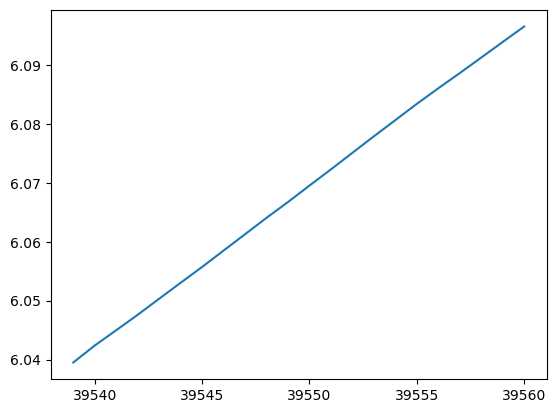

In [58]:
fundo = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '07.593.972/0001-86']

fundo.VL_QUOTA.plot(); 

# Analises dados cadastrais

 Extração da CAD_FI

In [60]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"

In [61]:
cadastral = pd.read_csv(url, sep=';', encoding='ISO-8859-1')

C:\Users\akira\AppData\Local\Temp\ipykernel_7352\1366623356.py:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep=';', encoding='ISO-8859-1')


In [62]:
cadastral.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cadastral.shape

(76616, 41)

Fundo de maior PL

In [64]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

In [71]:
cadastral[cadastral['CNPJ_FUNDO'] == '26.499.833/0001-32']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
69858,FII,26.499.833/0001-32,GENIAL MALLS FUNDO DE INVESTIMENTO IMOBILIÁRIO,2016-11-18,2016-10-19,316048.0,NaN,EM FUNCIONAMENTO NORMAL,2017-12-14,2017-12-14,...,22.119.959/0001-83,GENIAL GESTÃO LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN


In [72]:
cadastral[cadastral['CNPJ_FUNDO'] == comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
12166,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


Retornando algum fundo específico de acordo com o CNPJ

In [73]:
cadastral[cadastral['CNPJ_FUNDO'] == '26.499.833/0001-32']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
69858,FII,26.499.833/0001-32,GENIAL MALLS FUNDO DE INVESTIMENTO IMOBILIÁRIO,2016-11-18,2016-10-19,316048.0,NaN,EM FUNCIONAMENTO NORMAL,2017-12-14,2017-12-14,...,22.119.959/0001-83,GENIAL GESTÃO LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN


Retornando um fundo de acordo com o nome

In [95]:
#Não é muito válido. 
cadastral[cadastral['DENOM_SOCIAL'].str.contains('GENIAL') ]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
28658,FI,19.644.076/0001-88,GENIAL AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE...,2014-02-03,2014-01-24,221392.0,2023-12-18,CANCELADA,2023-12-18,2016-09-19,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,45.246.410/0001-55,BANCO GENIAL S.A.,N,Ações Livre
28919,FI,20.055.873/0001-09,GENIAL PERFORMANCE LOW VOL FUNDO DE INVESTIMEN...,2014-04-14,2014-03-26,225134.0,2019-12-06,CANCELADA,2019-12-06,2016-02-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
30330,FI,21.720.791/0001-02,GENIAL PERFORMANCE FUNDO DE INVESTIMENTO EM CO...,2015-02-27,2015-01-06,239194.0,NaN,EM FUNCIONAMENTO NORMAL,2015-12-01,2015-12-01,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,45.246.410/0001-55,BANCO GENIAL S.A.,N,Multimercados Livre
30858,FI,22.504.034/0001-56,GENIAL FUNDO DE INVESTIMENTO MULTIMERCADO CRED...,2015-08-11,2015-08-11,246557.0,NaN,EM FUNCIONAMENTO NORMAL,2015-08-20,2015-08-20,...,10.639.564/0001-22,WRIGHT CAPITAL GESTAO DE RECURSOS LTDA,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,S,Multimercados Invest. no Exterior
37016,FI,30.521.517/0001-97,BAHIA AM MARAÚ GENIAL FUNDO DE INVESTIMENTO EM...,2018-09-03,2018-09-03,306924.0,NaN,EM FUNCIONAMENTO NORMAL,2018-09-14,2018-09-14,...,13.151.244/0001-17,BAHIA AM RENDA FIXA LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,Multimercados Macro
38089,FI,31.848.223/0001-37,GENIAL PERFORMANCE PLUS FUNDO DE INVESTIMENTO ...,2018-12-04,2018-10-08,313530.0,2019-06-26,CANCELADA,2019-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
41574,FI,35.636.731/0001-02,GENIAL PERFORMANCE PREVIDÊNCIA ICATU FUNDO DE ...,2019-12-13,2019-12-13,346942.0,NaN,EM FUNCIONAMENTO NORMAL,2020-06-22,2020-06-22,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,Previdência Multimercado Livre
43659,FI,37.331.285/0001-53,GENIAL MS GLOBAL BRANDS FIA IE,2020-09-04,2020-05-28,375047.0,NaN,EM FUNCIONAMENTO NORMAL,2020-10-27,2020-10-27,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,01.522.368/0001-82,BANCO BNP PARIBAS BRASIL S/A,01.522.368/0001-82,BANCO BNP PARIBAS BRASIL S/A,S,Ações Invest. no Exterior
43660,FI,37.331.299/0001-77,GENIAL MS US GROWTH FIA IE,2020-09-03,2020-05-28,375004.0,NaN,EM FUNCIONAMENTO NORMAL,2020-10-19,2020-10-19,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,01.522.368/0001-82,BANCO BNP PARIBAS BRASIL S/A,01.522.368/0001-82,BANCO BNP PARIBAS BRASIL S/A,S,Ações Invest. no Exterior
43662,FI,37.331.342/0001-02,GENIAL MS GLOBAL BRANDS FIC FIA IE,2020-09-04,2020-05-28,375055.0,NaN,EM FUNCIONAMENTO NORMAL,2020-10-27,2020-10-27,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,01.522.368/0001-82,BANCO BNP PARIBAS BRASIL S/A,01.522.368/0001-82,BANCO BNP PARIBAS BRASIL S/A,S,Ações Invest. no Exterior


Filtrando Por Administração

In [94]:
cadastral[(cadastral['ADMIN'] == 'BANCO GENIAL S.A.') | (cadastral['ADMIN'] == 'GENIAL INVESTIMENTOS CORRETORA DE VALORES MOBILIÁRIOS S.A.')]


,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
7442,FI,03.913.576/0001-38,BRASIL PLURAL FMP-FGTS PETROBRÁS,2022-04-09,2000-07-05,449890.0,NaN,EM FUNCIONAMENTO NORMAL,2022-04-09,2022-04-09,...,NaN,NaN,10.830.108/0001-65,GRANT THORNTON AUDITORES INDEPENDENTES LTDA.,NaN,NaN,NaN,NaN,N,Ações FMP - FGTS
7540,FI,03.986.896/0001-18,AMÉRICA FUNDO DE INVESTIMENTO EM COTAS DE FUND...,2010-07-22,2010-06-23,144568.0,NaN,EM FUNCIONAMENTO NORMAL,2010-08-02,2010-08-02,...,25.098.663/0001-11,KP GESTÃO DE RECURSOS LTDA,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,60.746.948/0001-12,BANCO BRADESCO S.A.,45.246.410/0001-55,BANCO GENIAL S.A.,N,Ações Livre
8878,FI,04.894.410/0001-84,BRASIL PLURAL FMP-FGTS VALE DO RIO DOCE,2022-04-09,2002-02-15,449890.0,NaN,EM FUNCIONAMENTO NORMAL,2022-04-09,2022-04-09,...,NaN,NaN,10.830.108/0001-65,GRANT THORNTON AUDITORES INDEPENDENTES LTDA.,NaN,NaN,NaN,NaN,N,Ações FMP - FGTS
8918,FI,04.907.145/0001-21,BRASIL PLURAL BANESE STRATEGY FUNDO DE INVESTI...,2005-03-10,2003-10-02,17000.0,2017-07-24,CANCELADA,2017-07-24,2003-10-02,...,11.397.672/0002-80,PLURAL GESTÃO DE RECURSOS LTDA,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,60.701.190/0001-04,ITAU UNIBANCO S.A.,27.652.684/0001-62,GENIAL INVESTIMENTOS CORRETORA DE VALORES MOBI...,N,NaN
9361,FI,05.128.634/0001-48,PARTNER FUNDO DE INVESTIMENTO EM AÇÕES,2006-02-09,2006-01-10,65692.0,2006-12-27,CANCELADA,2006-12-27,2006-01-10,...,27.652.684/0001-62,GENIAL INVESTIMENTOS CORRETORA DE VALORES MOBI...,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74233,FIP,52.204.744/0001-21,FIEMG LAB VENTURES FUNDO DE INVESTIMENTO EM PA...,2023-09-15,2023-09-15,123230.0,NaN,FASE PRÉ-OPERACIONAL,2023-09-15,2023-09-15,...,48.957.769/0001-29,SLAT GESTORA DE RECURSOS E CONSULTORIA LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN
74382,FIP,53.991.780/0001-45,LESTE PRIVATE EQUITY US I CLASSE DE INVESTIMEN...,2024-02-20,2024-02-20,124032.0,NaN,FASE PRÉ-OPERACIONAL,2024-02-20,2024-02-20,...,17.036.001/0001-99,LESTE FINANCIAL SERVICES GESTÃO DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN
76418,FMP-FGTS,03.913.576/0001-38,BRASIL PLURAL FMP-FGTS PETROBRÁS,2000-08-17,2000-07-05,388.0,2022-04-08,CANCELADA,2022-04-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76489,FMP-FGTS,04.894.410/0001-84,BRASIL PLURAL FMP-FGTS VALE DO RIO DOCE,2002-03-27,2002-02-15,922.0,2022-04-08,CANCELADA,2022-04-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
cadastral[cadastral['ADMIN'] == 'BANCO GENIAL S.A.']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
7442,FI,03.913.576/0001-38,BRASIL PLURAL FMP-FGTS PETROBRÁS,2022-04-09,2000-07-05,449890.0,NaN,EM FUNCIONAMENTO NORMAL,2022-04-09,2022-04-09,...,NaN,NaN,10.830.108/0001-65,GRANT THORNTON AUDITORES INDEPENDENTES LTDA.,NaN,NaN,NaN,NaN,N,Ações FMP - FGTS
7540,FI,03.986.896/0001-18,AMÉRICA FUNDO DE INVESTIMENTO EM COTAS DE FUND...,2010-07-22,2010-06-23,144568.0,NaN,EM FUNCIONAMENTO NORMAL,2010-08-02,2010-08-02,...,25.098.663/0001-11,KP GESTÃO DE RECURSOS LTDA,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,60.746.948/0001-12,BANCO BRADESCO S.A.,45.246.410/0001-55,BANCO GENIAL S.A.,N,Ações Livre
8878,FI,04.894.410/0001-84,BRASIL PLURAL FMP-FGTS VALE DO RIO DOCE,2022-04-09,2002-02-15,449890.0,NaN,EM FUNCIONAMENTO NORMAL,2022-04-09,2022-04-09,...,NaN,NaN,10.830.108/0001-65,GRANT THORNTON AUDITORES INDEPENDENTES LTDA.,NaN,NaN,NaN,NaN,N,Ações FMP - FGTS
10279,FI,05.697.562/0001-50,VENTURESTAR FUNDO DE INVESTIMENTO MULTIMERCADO,2005-02-03,2003-08-04,5517.0,NaN,EM FUNCIONAMENTO NORMAL,2005-01-31,2003-08-04,...,027.256.658-68,LUÍS PAULO FRAGA DE MESQUITA,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,60.746.948/0001-12,BANCO BRADESCO S.A.,45.246.410/0001-55,BANCO GENIAL S.A.,N,Multimercados Macro
10280,FI,05.697.562/0001-50,VENTURESTAR FUNDO DE INVESTIMENTO MULTIMERCADO,2005-02-03,2003-08-04,5517.0,NaN,EM FUNCIONAMENTO NORMAL,2005-01-31,2003-08-04,...,20.675.481/0001-42,BLESS CAPITAL GESTORA DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,60.746.948/0001-12,BANCO BRADESCO S.A.,45.246.410/0001-55,BANCO GENIAL S.A.,N,Multimercados Macro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74183,FIP,51.753.815/0001-82,EVEREST - FUNDO DE INVESTIMENTO EM PARTICIPAÇÕ...,2023-08-09,2023-08-09,123182.0,NaN,EM FUNCIONAMENTO NORMAL,2023-09-29,2023-09-29,...,09.630.188/0001-26,PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN
74233,FIP,52.204.744/0001-21,FIEMG LAB VENTURES FUNDO DE INVESTIMENTO EM PA...,2023-09-15,2023-09-15,123230.0,NaN,FASE PRÉ-OPERACIONAL,2023-09-15,2023-09-15,...,48.957.769/0001-29,SLAT GESTORA DE RECURSOS E CONSULTORIA LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN
74382,FIP,53.991.780/0001-45,LESTE PRIVATE EQUITY US I CLASSE DE INVESTIMEN...,2024-02-20,2024-02-20,124032.0,NaN,FASE PRÉ-OPERACIONAL,2024-02-20,2024-02-20,...,17.036.001/0001-99,LESTE FINANCIAL SERVICES GESTÃO DE RECURSOS LTDA.,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,45.246.410/0001-55,BANCO GENIAL S.A.,NaN,NaN,NaN,NaN
76418,FMP-FGTS,03.913.576/0001-38,BRASIL PLURAL FMP-FGTS PETROBRÁS,2000-08-17,2000-07-05,388.0,2022-04-08,CANCELADA,2022-04-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
genial = cadastral[cadastral['DENOM_SOCIAL'].str.contains('GENIAL') & cadastral['GESTOR'].str.contains('GENIAL GESTÃO LTDA.')]


In [88]:
genial_plural = cadastral[cadastral['DENOM_SOCIAL'].str.contains('GENIAL') & cadastral['GESTOR'].str.contains('PLURAL INVESTIMENTOS GESTÃO DE RECURSOS LTDA..')]

In [90]:
genial_plural.CNPJ_FUNDO

Series([], Name: CNPJ_FUNDO, dtype: object)

In [85]:
genial.CNPJ_FUNDO

61501    32.311.976/0001-71
63629    52.856.288/0001-02
69858    26.499.833/0001-32
70215    36.501.198/0001-34
73766    44.951.421/0001-73
Name: CNPJ_FUNDO, dtype: object